# Dimensionality reduction analysis 

After applying the different clustering algorithms, we now look at ways to improve the obtained results. One way to do so is by applying dimension reduction techniques such as Principal Component Analysis (PCA) and Canonical Correlation Analysis (CCA). 


**<font color='red'>PCA:</font>** This method is used to reduced the dimensions of the data. In fact, sometimes we have variables that do not give any information about the data and thus removing these variables can lead to better results.  

**<font color='red'>CCA:</font>** This method is used to detect correlations between different subgroups of data. In fact, sometimes we have variables that are so strongly correlated that reducing the dimensions using linear combinations between the correlated variables can imporove the results
It is **important to note that we will NOT use the labels when applying PCA and CCA.** 

___


Therefore, in this part of the project, you will apply both PCA and CCA on the data you chose in the clustering part. Afterwards, you will apply the clustering method that gave the best results in TD2_3 on the reduced dataset you obtained from the PCA step. 

## Mount Drive

**For google colab users only**

## Import Libraries

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


## Load the dataset, separate data from classes



Load the dataset you are using in your project and separate the data from the class.

**<font color='red'>N.B:</font>** If you have applied some preprocessing steps (missing value replacement, factorize), please used the dataset you obtained after all the steps (you should have saved your dataset in notebook TD2_3.ipynb) without the normalization step.





In [3]:
df = pd.read_csv('preprocessed_data.csv', header=0)




In [4]:
true_labels = df["Survived"]
features = df.drop("Survived", axis=1)


In [5]:
preprocessed_data = features
preprocessed_data=df.drop(["Survived","Unnamed: 0"], axis=1) 


In [6]:
 
print(preprocessed_data)

     Pclass   Age  SibSp  Parch     Fare  Name  Sex  Cabin
0       3.0  22.0    1.0    0.0   7.2500     0    0      3
1       1.0  38.0    1.0    0.0  71.2833     1    1      0
2       3.0  26.0    0.0    0.0   7.9250     2    1      3
3       1.0  35.0    1.0    0.0  53.1000     3    1      1
4       3.0  35.0    0.0    0.0   8.0500     4    0      3
..      ...   ...    ...    ...      ...   ...  ...    ...
886     2.0  27.0    0.0    0.0  13.0000   886    0      3
887     1.0  19.0    0.0    0.0  30.0000   887    1    145
888     3.0  28.0    1.0    2.0  23.4500   888    1      3
889     1.0  26.0    0.0    0.0  30.0000   889    0    146
890     3.0  32.0    0.0    0.0   7.7500   890    0      3

[891 rows x 8 columns]


## Part 1: Apply PCA


##### We start by scaling the data so that each feature has a single unit variance.  


**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale both continuous and numerical variables. 
PCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

In [7]:
# Use StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciate scaler object
scaler = StandardScaler()

# fit scaler to our data
scaler.fit(preprocessed_data)

# scale our data
data_scaled = scaler.transform(preprocessed_data)


##### We then instantiate a PCA object.

The main parameter of this method is the max number of components. In this project, we will choose it to be equal to the max number of variables in the data. 


In [8]:

from sklearn.decomposition import PCA

# instanciate a PCA object
pca = PCA() 
pca2 = PCA(n_components=8)
# fit the object to our data
pca.fit(data_scaled)

# apply PCA to our data to get new coordinates
data_pca = pca.transform(data_scaled)
data_pca.shape


(891, 8)

### Interpreting the components 

The next step is to choose the number of components to keep.

##### Plot the explained variance of each component using the corrected variance.

In [9]:
# Explained variance (eigenvalues)
print("Explained variance")
print(pca.explained_variance_)

# Corrected variance values 
n = len(data_pca) # number of samples
corrected_variance = (n/(n-1))*pca.explained_variance_
print("\nCorrected variance")
print(corrected_variance)

Explained variance
[2.22979906 1.75616396 1.05008585 0.87194374 0.73935753 0.5571127
 0.5047634  0.29976252]

Corrected variance
[2.23230445 1.75813718 1.05126572 0.87292345 0.74018827 0.55773867
 0.50533055 0.30009934]


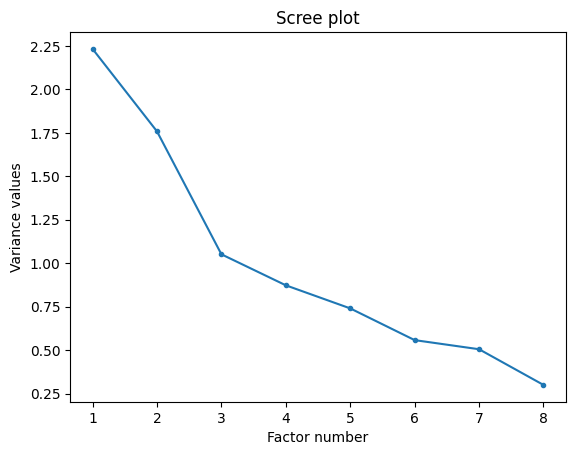

In [10]:
# plot the explained variance of each component
p = data_pca.shape[1] # number of components
plt.plot(np.arange(1,p+1),corrected_variance, marker='.')
plt.title("Scree plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

##### Plot the cumulative variance of the components based on the explained variance ratio.

In [11]:
explained_variance_ratio=pca.explained_variance_ratio_*100
cumulative_var = np.cumsum(explained_variance_ratio)
cumulative_var

array([ 27.84120597,  49.76861795,  62.87995927,  73.76702338,
        82.99861989,  89.95471279,  96.25717388, 100.        ])

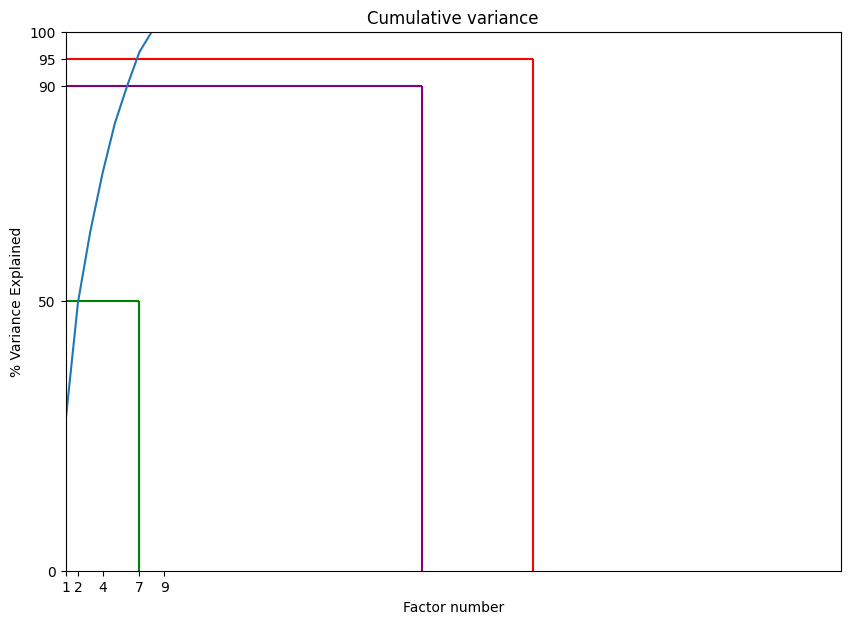

In [12]:
# plot the cumulative variance
plt.figure(figsize=(10,7))
plt.title("Cumulative variance")
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')

plt.hlines(y=95.0, xmin=0, xmax=39, color='red')
plt.vlines(x=39.0, ymin=0, ymax=95,color='red')

plt.hlines(y=90.0,xmin=0, xmax=30, color='purple')
plt.vlines(x=30.0, ymin=0, ymax=90, color='purple')

plt.hlines(y=50.0, xmin=0, xmax=7, color='green')
plt.vlines(x=7.0,ymin=0, ymax=50, color='green')

plt.ylim(0,100)
plt.xlim(1,64)
plt.yticks([0,50,90,95,100])
plt.xticks([1,2,4,7,9])
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)
plt.show()

##### How many components will you keep? Explain your choice. 

Cette représentation graphique montre dans quelle mesure la variance totale est expliquée par les x premières composantes. La réduction de dimensionnalité est un compromis : nous voulons conserver le nombre le plus faible de facteurs, tout en expliquant encore un pourcentage important de la variance.
Comme nous pouvons le voir sur la figure en vert, 7 composantes suffisent pour expliquer 50% de la variance. Cela semble être un bon compromis . nous voyons aussi  que 9 composantes expliquent plus que 70% de la variance, ce qui signifie que chaque composante supplémentaire ne contient que très peu d'informations.
=========>Alors, nous avons décidé de conserver 7 composantes.

**Note:** If you do choose to keep all components in your analysis, you do not perform any dimension reduction. 

##### Create your reduced dimensionality dataset by only keeping the components you chose to keep in the above question. 

In [13]:
# When we looked at cumulative variance, we decided that the first 30 components
# were enough to get a good representation of our data, so we create a new data 
# object and only keep the first 30 components as variables

data_reduc = data_pca[:,:7]


##### What is the inertia percentage explained by the components you kept *(le pourcentage d’inertie expliquée par le premier axe factoriel)*? 

What does it mean?

In [14]:
# calculate the inertia percentage explained by the components we kept
total_inertia = sum(pca.explained_variance_)
kept_inertia = sum(pca.explained_variance_[:7])
inertia_percent = kept_inertia / total_inertia * 100

# print the result
print("Inertia percentage explained by the components we kept is: {:.2f}%".format(inertia_percent))


Inertia percentage explained by the components we kept is: 96.26%


##### Calculate the contribution of the first individual to the first component *(la contribution du premier individu au premier axe factoriel)*.

In [15]:
contribution = data_pca**2

contribution[:,0]= contribution[:,0]/(n*corrected_variance[0])
print("Contribution of first individual to first component:", contribution[(0,0)])


Contribution of first individual to first component: 0.0011535367389123186


##### Calculate the quality of representation of this individual in the map made of the first factorial axis *(la qualité de représentation de cet individu dans le plan constitué du premier axe factoriel)*. 

What can you deduce? 

In [16]:
X= np.sum(data_pca**2,axis=1)
Quality_representation = data_pca**2
Quality_representation[:,0] = Quality_representation[:,0]/X
print("The quality of first individual to first component:",Quality_representation[(0,0)])


The quality of first individual to first component: 0.42527056579136935


### Variable representation

#### Compute the correlation between the principal components and the variables 

In [17]:
#preprocessed_data = pd.DataFrame(preprocessed_data, columns=preprocessed_data.columns)
#Methode :n°:01
scaled_data = pd.DataFrame(data_scaled)
pca_data = pd.DataFrame(data_pca)
#cc_var = pd.concat((pca_data , data_scaled), axis=1)

#corr_cc_var = cc_var.corr(method="pearson")
#corr_cc_var.style.background_gradient(cmap='coolwarm')

In [18]:
#Methode :n°:02
# Compute the correlation of the variables with the principal axes
variance = np.sqrt(corrected_variance)
correlation_matrix = np.zeros((p,p))
for k in range(p):
  correlation_matrix[:,k] = pca.components_[k,:] * variance[k]


##### Print the correlation matrix.

In [19]:
print(correlation_matrix)

[[-0.87799279  0.07554657 -0.16288551 -0.04998194  0.11388709  0.01765526
   0.0651488   0.42321815]
 [ 0.43198312 -0.48347922  0.22898794  0.12383535  0.70186463 -0.09625653
   0.07145196  0.08444852]
 [-0.04690478  0.74379734 -0.09416971  0.40652149  0.09712317 -0.51072239
   0.03720668 -0.03211933]
 [ 0.0800597   0.77357612 -0.11036889  0.08574647  0.34795308  0.44468728
  -0.24037754 -0.03585596]
 [ 0.72596559  0.32905577  0.12468878  0.17174869 -0.19522355  0.19734967
   0.45764821  0.18814566]
 [ 0.20281618 -0.13622179 -0.92039979 -0.15284105  0.14468134 -0.0080797
   0.21076938 -0.08148498]
 [ 0.22949811  0.48144997  0.18893445 -0.79347565  0.11870473 -0.18610694
   0.05643753  0.02394497]
 [ 0.80335811 -0.09162471 -0.22993485  0.00403376 -0.17596605 -0.12621227
  -0.42398619  0.26253558]]


##### Plot the correlation circle

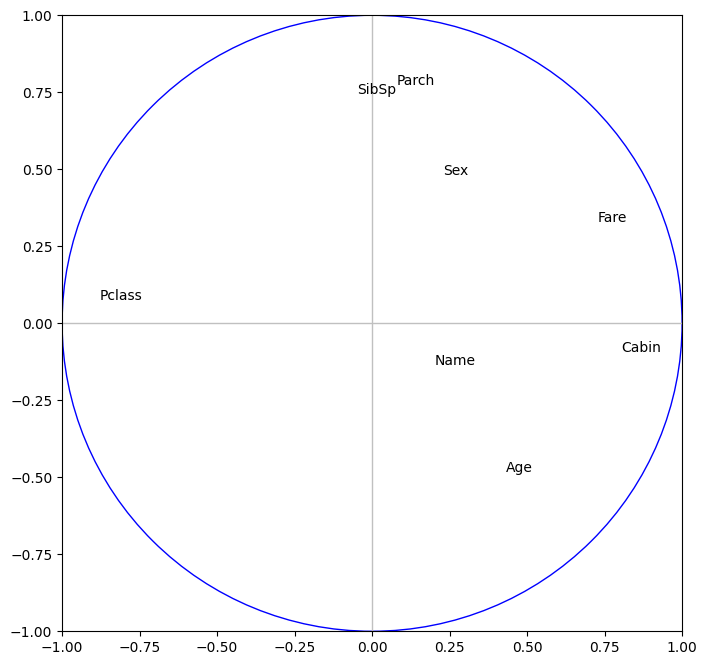

In [20]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(preprocessed_data.columns[j],(correlation_matrix[j,0],correlation_matrix[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

##### Interpret the obtained results

À partir du graphique du cercle de corrélation généré par le code, nous pouvons voir que certaines variables sont étroitement regroupées, tandis que d'autres sont plus dispersées. Par exemple, nous pouvons voir que "cabin" et "Fare" sont étroitement regroupés du côté droite du graphique, indiquant une  corrélation positive entre ces variables. Cela a du sens, car les passagers de certains cabins   ont probablement payé plus cher pour leurs billets.

Nous pouvons également voir que "Parch" et "SibSp" sont étroitement regroupés en bas à droite du graphique, indiquant une corrélation positive modérée entre ces variables. Il est possible qu'il y ait une corrélation entre ces deux variables car les familles ayant plus d'enfants auront probablement plus de frères et sœurs ou de conjoints à bord également. 

Inversement, nous pouvons voir que "Pclass" et "Sex" sont relativement éloignés sur le graphique, suggérant une faible corrélation entre ces variables. Cela a du sens, car le type de class et le sexe d'un passager sont probablement sans rapport.



## Applying clustering on the newly created dataset. 

Recall in TD2_3.ipynb, you applied different clustering algorithms on your dataset and analyzed which method gave the best results on your dataset.

##### Apply this clustering method to the dataset you obtained after applying PCA and performing dimension reduction. 

In [21]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

n_neighbors = 10
adjacency = kneighbors_graph(preprocessed_data, n_neighbors=n_neighbors, mode='connectivity', include_self=True)

# Apply spectral clustering with nearest neighbors
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=0)
spectral.fit(preprocessed_data)
predicted_labels = spectral.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [22]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import completeness_score 
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score


##### Using the same metrics you used in TD2_3.ipynb, compare the results obtained with this method to the real classes. 

In [23]:
ari = adjusted_rand_score(true_labels, predicted_labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: -0.0008927137467439263


In [24]:
homo = homogeneity_score(true_labels, predicted_labels)
print("Homogeneity Score:", homo)

Homogeneity Score: 5.174880085546831e-05


In [25]:
v_meas = v_measure_score(true_labels, predicted_labels)
print("V-measure Score:", v_meas)

V-measure Score: 5.072646203568534e-05


On remarque que les résultats sont inférieurs par rapport aux résultats de la partie 1, malgré l'utilisation de la meilleure méthode qui nous a donné les meilleurs résultats dans la partie 1. 

##### In your opinion, did dimensionality reduction help you in getting better results or not? 

d'apres la remarque de question precedents Cela suggère que la PCA ne donne pas toujours les meilleurs résultats pour toutes les données. (c 'est juste un point de vue )


## Part 2: Apply CCA

Next steps:
   - Apply CCA /!\ Don't forget to split the dataset into two groups,i.e., p=3 and q=3
   - Analyze the correlation circle *(graphe des variables)*
   - Analyze the observation graph *(graphe des individus)*

**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale use continuous and numerical variables. 
CCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

### Choice of the two groups

##### Show the correlation matrix of the data

In [26]:

data_scaled = pd.DataFrame(data_scaled , columns=preprocessed_data.columns)


In [27]:
corr = data_scaled.corr() 
corr

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Cabin
Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.035144,-0.131900,-0.612417
Age,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.034212,-0.081163,0.219211
SibSp,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.057527,0.114631,-0.059244
Parch,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.001652,0.245489,-0.005675
Fare,-0.549500,0.096688,0.159651,0.216225,1.000000,0.012658,0.182333,0.389012
Name,-0.035144,0.034212,-0.057527,-0.001652,0.012658,1.000000,-0.042939,0.250672
Sex,-0.131900,-0.081163,0.114631,0.245489,0.182333,-0.042939,1.000000,0.078396
Cabin,-0.612417,0.219211,-0.059244,-0.005675,0.389012,0.250672,0.078396,1.000000


##### Split your data into two groups p and q

In [28]:
X_Demographic  = data_scaled[["Age", "Sex","SibSp","Parch"]]
X_FareClass= data_scaled[["Fare", "Pclass","Cabin"]]

##### How did you choose your two groups? 


Nous avons choisi de diviser les variables du jeu de données Titanic en deux groupes: les variables démographiques (âge et sexe) et les variables liées au tarif et à la classe de billet (tarif et classe). Cette division nous permet de voir comment les variables démographiques peuvent influencer les choix liés au tarif et à la classe de billet. Par exemple, nous pourrions supposer que les passagers plus âgés et de sexe différent pourraient avoir des préférences différentes en matière de tarification et de classe de billet par rapport aux passagers plus jeunes ou de même sexe. Cette division nous permet de mieux comprendre comment les variables du groupe démographique peuvent interagir avec les variables du groupe tarifaire et de la classe de billet pour influencer les choix des passagers dans le Titanic.

### Apply CCA

CCA with scikit-learn uses a very similar process to other preprocessing functions that come with scikit-learn. We instantiate a CCA object, find the  components (linear combinations of the variables) using the fit method, then apply the dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the CCA object.

Check the scikit-learn documentation for CCA. Do you need to use the scaled or unscaled data to apply CCA? 



J'ai remarqué dans la documentation du CCA de scikit-learn qu'il existe un paramètre "scale", mais lorsque j'ai vérifié l'exemple fourni, je me suis rendu compte qu'il n'était pas utilisé. Je pense donc que l'utilisation de le scale  est recommandée mais pas obligatoire.

##### Apply CCA 

In [29]:
from sklearn.cross_decomposition import CCA 

cca = CCA(n_components=2, scale=False)
cca.fit(X_Demographic,X_FareClass)

U_, V_ = cca.transform(X_Demographic,X_FareClass)

##### Print the first two components

In [30]:
print(U_[:2,:])
print(V_[:2,:])

[[-0.7794525  -0.65271003]
 [ 1.02602564  0.78138565]]
[[-0.60864873 -0.38235186]
 [ 1.12600307  0.64892326]]


In [31]:
data_cca = pd.DataFrame({"U_1": U_[:,0], "U_2": U_[:,1],
                         "V_1": V_[:,0], "V_2": V_[:,1]})

##### Print the correlation matrix between the first two components

In [32]:
corr_cca = data_cca.corr()
corr_cca.style.background_gradient(cmap='coolwarm') 

,U_1,U_2,V_1,V_2
U_1,1.000000,-0.000000,0.387090,-0.000000
U_2,-0.000000,1.000000,-0.000172,0.304968
V_1,0.387090,-0.000172,1.000000,-0.000000
V_2,-0.000000,0.304968,-0.000000,1.000000


##### What can you conclude? 

D'après la matrice de corrélation que nous avons  fournie, il semble qu'il existe une corrélation positive (0,37) entre la première composante des variables démographiques (U_1) et la première composante des variables de tarif et de classe (V_1).Cela suggère qu'il peut y avoir une relation entre ces deux groupes de variables, bien qu'elle ne soit pas nécessairement causale. La matrice de corrélation montre également une corrélation positive faible (0,16) entre la deuxième composante des variables de tarif et de classe (V_2) et la deuxième composante des variables démographiques (U_2).

### Results visualization and interpretation 

#### Variable representation

##### Compute the correlation between the components and the variables

[*aide: utiliser les matrices centrées-réduites*]

In [33]:
cc_var = pd.concat((data_cca, data_scaled), axis=1)

corr_cc_var = cc_var.corr(method="pearson")
corr_cc_var.style.background_gradient(cmap='coolwarm')

,U_1,U_2,V_1,V_2,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Cabin
U_1,1.000000,-0.000000,0.387090,-0.000000,-0.358667,0.920601,-0.438922,-0.305772,0.077099,0.028559,0.187802,0.229480
U_2,-0.000000,1.000000,-0.000172,0.304968,-0.114099,0.085764,0.649584,0.802082,0.298414,-0.032333,0.563668,0.072039
V_1,0.387090,-0.000172,1.000000,-0.000000,-0.926571,0.356341,-0.170014,-0.118499,0.199175,0.053525,0.072599,0.592834
V_2,-0.000000,0.304968,-0.000000,1.000000,-0.374656,0.026155,0.198102,0.244609,0.978624,-0.013058,0.171901,0.236553
Pclass,-0.358667,-0.114099,-0.926571,-0.374656,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.035144,-0.131900,-0.612417
Age,0.920601,0.085764,0.356341,0.026155,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.034212,-0.081163,0.219211
SibSp,-0.438922,0.649584,-0.170014,0.198102,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.057527,0.114631,-0.059244
Parch,-0.305772,0.802082,-0.118499,0.244609,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.001652,0.245489,-0.005675
Fare,0.077099,0.298414,0.199175,0.978624,-0.549500,0.096688,0.159651,0.216225,1.000000,0.012658,0.182333,0.389012
Name,0.028559,-0.032333,0.053525,-0.013058,-0.035144,0.034212,-0.057527,-0.001652,0.012658,1.000000,-0.042939,0.250672


##### Show the correlation circle

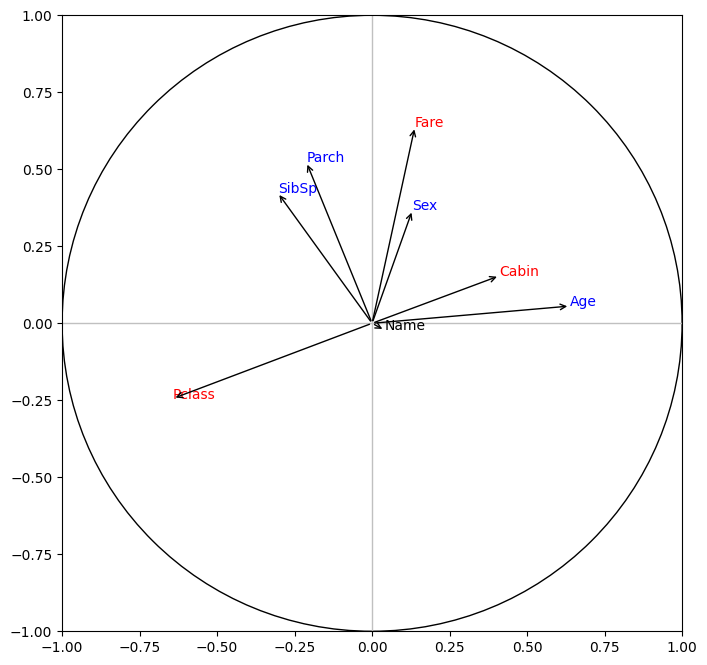

In [34]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Print the labels (variable names)
for col in data_scaled:
    if col in X_Demographic.columns: color="b"
    elif col in X_FareClass.columns: color="r"
    else: color = "black"

    # Get coordinates in the two canonical components  
    coord_horizontal = .5 * (corr_cc_var.at["U_1",col] + corr_cc_var.at["V_1",col])
    coord_vertical = .5 * (corr_cc_var.at["U_2",col] + corr_cc_var.at["V_2",col])
    plt.annotate(col,(coord_horizontal,coord_vertical), color=color)
    axes.annotate("", xy=(coord_horizontal,coord_vertical), xytext=(0, 0),arrowprops=dict(arrowstyle="->", color="black"))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

##### Interpret the obtained results

On remarque la prochtie du indevidis de les  deux groupes, cela assure l'existance de la coorilation entre les deux derniers comme on a supposer lors de choix des deux groupes dans la question au dessus .

#### Individual visualization 

##### Show the individuals representation

[]

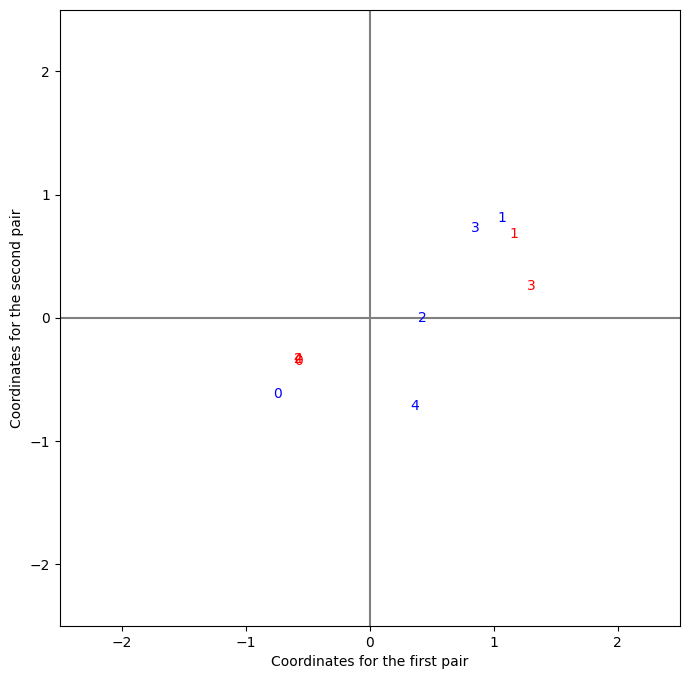

In [35]:
from matplotlib.pyplot import figure
fig, axes = plt.subplots(figsize=(8,8))

# We can plot the first 5 samples in the dataset
# by their coordinates in the first group of variables (in blue)
# and their coordinates in the second group of variables (in red)
# to see how far the two groups place the same sample.
for i in range(5):
    plt.annotate(i, (U_[i,0],U_[i,1]), color="b")
    plt.annotate(i, (V_[i, 0],V_[i, 1]), color="r")

plt.xlabel('Coordinates for the first pair')
plt.ylabel('Coordinates for the second pair')

# Modify xlim and ylim out zoom in and out of the figure
coord = 2.5
plt.xlim(-coord,coord)
plt.ylim(-coord,coord)

plt.hlines(0, -coord, coord, color="grey")
plt.vlines(0, -coord, coord, color="grey")

plt.plot()

##### Interpret the obtained results

Nous pouvons constater qu'il y a un certain chevauchement entre les deux groupes, suggérant qu'il existe une certaine relation entre les variables démographiques et les variables de tarif/classe. Cependant, il y a également une certaine séparation entre les deux groupes, ce qui indique qu'ils ne sont pas complètement corrélés.



### CCA Conclusion
Based on your visualizations, do you think it would be useful to use the CCA results to reduce the dimensionality of your dataset before applying some form of clustering method, like you did with PCA? Why / why not?

La visualisation suggère que la CCA pourrait être une technique utile dans ce cas. En identifiant la relation linéaire entre les deux ensembles de variables, la CCA pourrait capturer certaines informations qui ne sont pas capturées par chaque ensemble de variables seul. Cela pourrait aider à réduire le bruit dans les données et améliorer les performances des algorithmes de clustering.